In [7]:
import numpy as np
import pylab as plt
import scipy as sc

import networkx as nx

from NAQ_graphs import NAQ
%matplotlib notebook

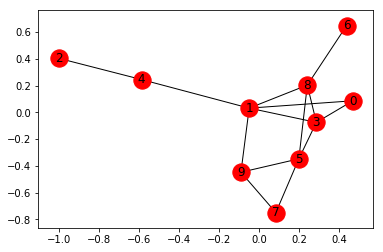

In [2]:
G = nx.erdos_renyi_graph(10,0.2)
#G = nx.newman_watts_strogatz_graph(21,3, 0.2)


pos = nx.spring_layout(G)
#pos = {i: np.array([np.cos(2*np.pi*i/len(G)),np.sin(2*np.pi*i/len(G))]) for i in range(len(G))}
plt.figure()
nx.draw_networkx(G,pos=pos)

<IPython.core.display.Javascript object>


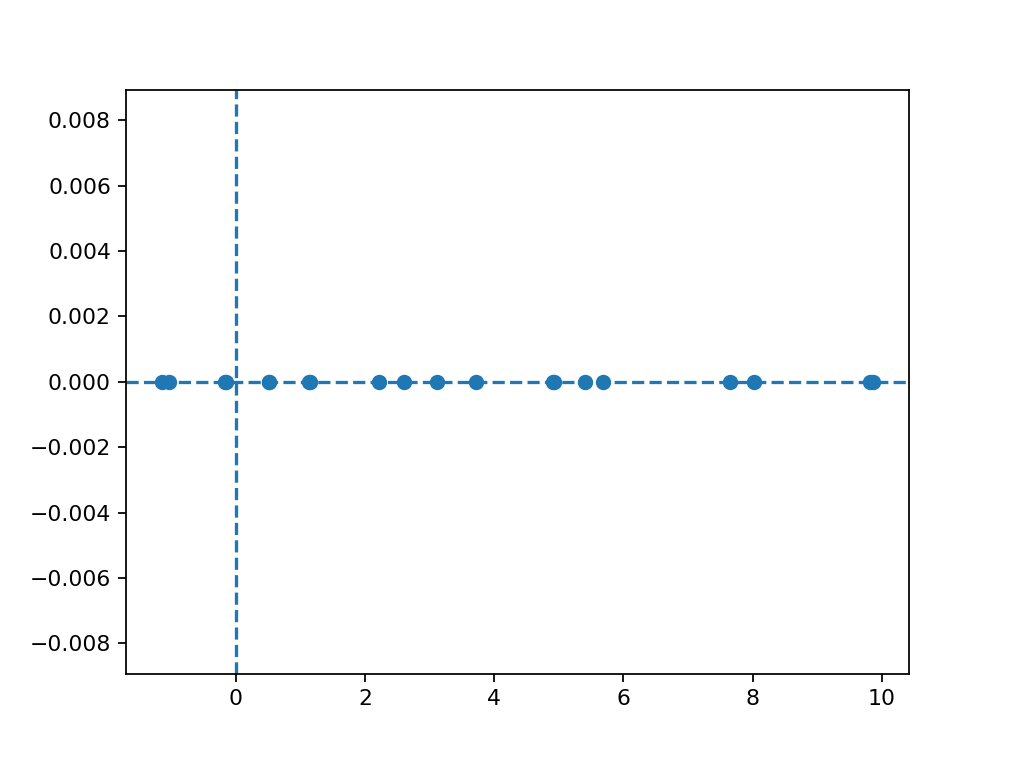

In [11]:
chi0 = np.array( [[ 0,1.,0],[-1.,0,0],[0,0,0]]) #along [0,0,1]
chi = {i: chi0 for i in range(len(G.edges))}
chi[0] = np.array( [[ 0,0,1.],[0.,0,0],[-1.,0,0]]) #along [0,1,0]
#chi[1] = np.array( [[ 0,0,1.],[0.,0,0],[-1.,0,0]]) #along [0,1,0]


naq_so3 = NAQ(G, pos, chi, 'SO3')
naq_so3.n_edges=1
naq_so3.unit_len(10)
naq_so3.update_laplacian(1.)

naq_so3.project_L(2)

L = naq_so3.L0_proj.todense()
w, v = np.linalg.eig(L)

plt.figure()
plt.scatter(np.real(w), np.imag(w))
plt.axvline(0,ls='--')
plt.axhline(0,ls='--')

In [12]:
def compute_spectrum(self, Ks,digit=7):
    
    def cond_L0(k):
        return -self.test_Laplacian(k[0])[2]

    k_mu = []
    for k in Ks:
        k_mu.append(sc.optimize.fmin(cond_L0, k,disp=False)[0])
    
    return np.unique(np.around(k_mu,digit))

Ks = np.linspace(2,4,10)
k_mu = compute_spectrum(naq_so3, Ks)

In [13]:
K = np.linspace(2,4,500)
s = np.zeros(len(K))
r = np.zeros(len(K))

for i,k in enumerate(K):
    s[i]= naq_so3.test_Laplacian(k)[2]
    r[i]= naq_so3.test_Laplacian(k)[1]

<IPython.core.display.Javascript object>


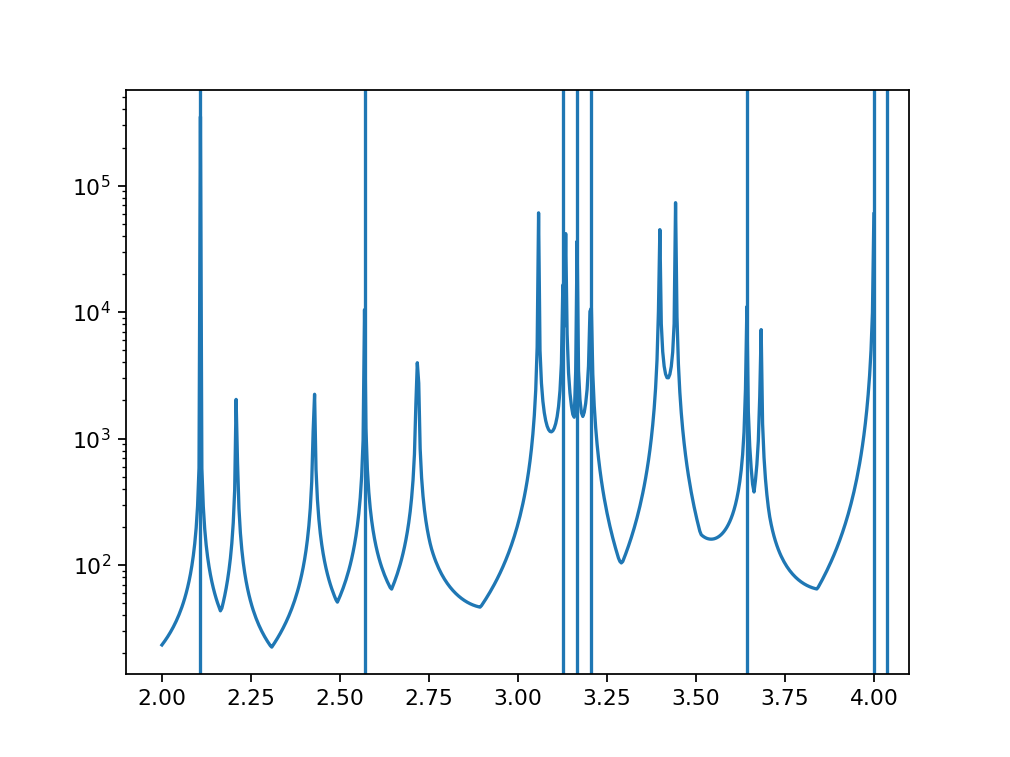

In [14]:
plt.figure()
plt.semilogy(K,abs(s))
for k in k_mu:
    plt.axvline(k)

In [7]:
def compute_solution(self, s_min = 1e-2, test_cond = False):
        """
        Compute electric field E and edge variables X
        """

        if self.cond_type == 'svd':
            try:
                u, s, vh = np.linalg.svd(self.L0.todense())
            except np.linalg.LinAlgError:
                print('svd error, use the same value')
            print(s)
            s = s[-1]
            v = vh[-1]
            print(s,v)
        elif self.cond_type == 'eig':
            s, v = sc.sparse.linalg.eigs(self.L0_proj,k=1,sigma=0)
            print(s)
            I = 0
            s = abs(s[I])
            print(np.shape(v))
            v = np.real(v[:,I])#.flatten())]
        if test_cond:
            print("Condition number=",1/s)

        if s > s_min:
            print('Laplacian not singular!',s)
            return 0

        self.phi = np.asarray(v.conj().T).flatten() #electric field at the nodes
        
naq_so3 = NAQ(G, pos, chi, 'SO3')
naq_so3.cond_type='eig'
naq_so3.unit_len(10)

In [8]:
def plot_solution(self):
    phix = np.zeros(len(G))
    phiy = np.zeros(len(G))
    phiz = np.zeros(len(G))

    phix = self.phi[::2]
    phiy[1:] = (self.phi[1::2])[1:]
    phiz[0] = self.phi[1]

    #phix = naq_so3.phi[::2]
    #phiy = naq_so3.phi[1::2]
    phi_n = np.sqrt(phix**2+phiy**2+phiz**2)
    phi_n /= np.max(phi_n)

    phix /= np.max(abs(phix))
    phiy /= np.max(abs(phiy))
    phiz /= np.max(abs(phiz))

    f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(10,10))

    nx.draw(G,pos=pos, node_color= phix,cmap='bwr',ax=ax1,vmin=-1,vmax=1)
    nx.draw(G,pos=pos, node_color= phiy,cmap='bwr',ax=ax2,vmin=-1,vmax=1)
    nx.draw(G,pos=pos, node_color= phiz,cmap='bwr',ax=ax3,vmin=-1,vmax=1)
    nx.draw(G,pos=pos, node_color= phi_n,cmap='bwr',ax=ax4,vmin=0,vmax=1)

for i, k in enumerate(k_mu):
    if k>1e-5:
        naq_so3.update_laplacian(k)

        naq_so3.project_L(2)

        compute_solution(naq_so3)
        plot_solution(naq_so3)
        plt.title('k='+str(k))
        plt.savefig('images/k_'+str(i)+'.png')
        plt.close()

[1.70192795e-08+0.j]
(20, 1)
[-8.02956249e-08+0.j]
(20, 1)
[-2.23068193e-07+0.j]
(20, 1)
[0.39700664+0.j]
(20, 1)
Laplacian not singular! 0.39700663719167617
[4.06707772e-08+0.j]
(20, 1)
[9.15316899e-07+0.j]
(20, 1)
[3.04453913e-08+0.j]
(20, 1)
[1.55884699+0.j]
(20, 1)
Laplacian not singular! 1.5588469948936055
[0.31845411+0.j]
(20, 1)
Laplacian not singular! 0.31845410879751535
[1.3755163+0.j]
(20, 1)
Laplacian not singular! 1.3755163029179396
